<a href="https://colab.research.google.com/github/Beebruna/Treinamento_Data_Science/blob/main/mnist_cnn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST é a sigla para "Modified National Institute of Standards and Technology" - Instituto Nacional de Padrões e Tecnologia Modificado, que se refere a um conjunto de dados muito popular.

In [10]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
mnist = keras.datasets.mnist

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
train_images = train_images / 255
test_images = test_images / 255

In [14]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 263s 140ms/step - loss: 0.0985 - accuracy: 0.9687
Epoch 2/5
1875/1875 [==============================] - 262s 140ms/step - loss: 0.0328 - accuracy: 0.9897
Epoch 3/5
1875/1875 [==============================] - 316s 168ms/step - loss: 0.0218 - accuracy: 0.9935
Epoch 4/5
1875/1875 [==============================] - 312s 166ms/step - loss: 0.0161 - accuracy: 0.9954
Epoch 5/5
1875/1875 [==============================] - 310s 165ms/step - loss: 0.0123 - accuracy: 0.9965


In [18]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 9s 28ms/step - loss: 0.0400 - accuracy: 0.9925


In [19]:
test_loss

0.040018606930971146

In [20]:
test_accuracy

0.9925000071525574

In [21]:
predictions = model.predict(test_images)
print("Scores para o objeto #0 no teste: ")
print(predictions[0])
print("Classe predita = " + str(np.argmax(predictions[0])))

313/313 [==============================] - 10s 31ms/step
Scores para o objeto #0 no teste: 
[1.6131524e-17 2.1394125e-17 2.9620200e-17 2.7462429e-13 5.3283680e-17
 1.2487476e-15 1.0854077e-21 9.9999994e-01 7.5583535e-19 6.4295167e-14]
Classe predita = 7


In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} {100*np.max(predictions_array):2.0f}% ({true_label})", color=color)

In [25]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10), range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

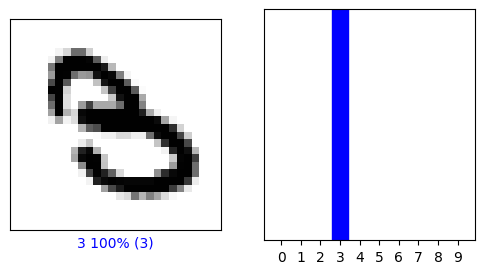

In [42]:
i = 18
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

In [33]:
predictions = model.predict(test_images)

313/313 [==============================] - 9s 29ms/step


In [44]:
for i in range(10000):
    if (np.argmax(predictions[i] != test_labels[i])):
        print(i)